<a href="https://colab.research.google.com/github/OscarGuti17/Ejercicio-Curso/blob/main/Presentaci%C3%B3n_Ejecutivos_RRHH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
# Load the Data
df = pd.read_csv('/content/sample_data/employee_attrition.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    588 non-null    object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Limpiar Columnas

In [10]:
(df['Age'].value_counts())

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64

In [11]:
(df['Attrition'].value_counts())

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [12]:
(df['BusinessTravel'].value_counts())

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [13]:
(df['DailyRate'].value_counts())

DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: count, Length: 886, dtype: int64

In [14]:
(df['Department'].value_counts())

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [15]:
(df['DistanceFromHome'].value_counts())

DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: count, dtype: int64

In [16]:
(df['Education'].value_counts())

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

In [17]:
(df['EducationField'].value_counts())

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [18]:
(df['EmployeeCount'].value_counts())

EmployeeCount
1    1470
Name: count, dtype: int64

In [19]:
(df['EmployeeNumber'].value_counts())

EmployeeNumber
1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
2068    1
Name: count, Length: 1470, dtype: int64

In [20]:
(df['EnvironmentSatisfaction'].value_counts())

EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64

In [21]:
(df['Gender'].value_counts())

Gender
Female    588
Name: count, dtype: int64

In [46]:
(df['HourlyRate'].value_counts())

HourlyRate
66    29
98    28
42    28
48    28
84    28
      ..
31    15
53    14
68    14
38    13
34    12
Name: count, Length: 71, dtype: int64

In [23]:
(df['JobInvolvement'].value_counts())

JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

In [24]:
(df['JobLevel'].value_counts())

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

In [25]:
(df['JobSatisfaction'].value_counts())

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

In [26]:
(df['MaritalStatus'].value_counts())

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [27]:
(df['MonthlyIncome'].value_counts())

MonthlyIncome
2342     4
6142     3
2741     3
2559     3
2610     3
        ..
7104     1
2773     1
19513    1
3447     1
4404     1
Name: count, Length: 1349, dtype: int64

In [30]:
(df['MonthlyRate'].value_counts())

MonthlyRate
4223     3
9150     3
9558     2
12858    2
22074    2
        ..
14561    1
2671     1
5718     1
11757    1
10228    1
Name: count, Length: 1427, dtype: int64

In [31]:
(df['NumCompaniesWorked'].value_counts())

NumCompaniesWorked
1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: count, dtype: int64

In [32]:
(df['Over18'].value_counts())

Over18
Y    1470
Name: count, dtype: int64

In [33]:
(df['OverTime'].value_counts())

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [34]:
(df['PercentSalaryHike'].value_counts())

PercentSalaryHike
11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: count, dtype: int64

In [35]:
(df['PerformanceRating'].value_counts())

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

In [36]:
(df['RelationshipSatisfaction'].value_counts())

RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64

In [37]:
(df['StandardHours'].value_counts())

StandardHours
80    1470
Name: count, dtype: int64

In [38]:
(df['StockOptionLevel'].value_counts())

StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64

In [39]:
(df['TotalWorkingYears'].value_counts())

TotalWorkingYears
10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
2      31
14     31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: count, dtype: int64

In [40]:
(df['TrainingTimesLastYear'].value_counts())

TrainingTimesLastYear
2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: count, dtype: int64

In [41]:
(df['WorkLifeBalance'].value_counts())

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

In [42]:
(df['YearsAtCompany'].value_counts())

YearsAtCompany
5     195
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
5!      1
34      1
30      1
Name: count, dtype: int64

In [47]:
# Corregir "YearsAtCompany" 5! a 5
df['YearsAtCompany'].replace({"5!":"5"}, inplace=True)
df['YearsAtCompany'].value_counts()


YearsAtCompany
5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
34      1
30      1
Name: count, dtype: int64

In [43]:
(df['YearsInCurrentRole'].value_counts())

YearsInCurrentRole
2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: count, dtype: int64

In [44]:
(df['YearsSinceLastPromotion'].value_counts())

YearsSinceLastPromotion
0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: count, dtype: int64

In [45]:
(df['YearsWithCurrManager'].value_counts())

YearsWithCurrManager
2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
15      5
14      5
16      2
Name: count, dtype: int64

In [48]:
# Mostrar valores columnas con numeros Faltantes
print(df.isna().sum())

Age                           0
Attrition                     0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                      882
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [49]:
# Reemplazar datos perdidos "Gender" Vacios = Male
# asumiendo que todo lo que es vacio es Male
df['Gender'].fillna('Male', inplace=True)

In [51]:
# Mostrar valores columnas con numeros Faltantes
print(df.isna().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [52]:
# Cambiar ‘EmployeeNumber’ debe ser el índice del marco de datos
df.set_index('EmployeeNumber', inplace=True)

In [54]:
# Cambio La columna ‘EmployeeNumber’
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,...,3,80,1,17,3,3,5,2,0,3
2062,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,...,1,80,1,9,5,3,7,7,1,7
2064,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,...,2,80,1,6,0,3,6,2,0,3


# PARTE 2 EXAMEN

In [56]:
# Analisís de tendencias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                   147

In [58]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,...,3,80,1,17,3,3,5,2,0,3
2062,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,...,1,80,1,9,5,3,7,7,1,7
2064,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,...,2,80,1,6,0,3,6,2,0,3


from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['DailyRate'].plot(kind='hist', bins=20, title='DailyRate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['DistanceFromHome'].plot(kind='hist', bins=20, title='DistanceFromHome')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Education'].plot(kind='hist', bins=20, title='Education')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Attrition').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('BusinessTravel').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Department').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('EducationField').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='DailyRate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='DailyRate', y='DistanceFromHome', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='DistanceFromHome', y='Education', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Education', y='EnvironmentSatisfaction', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['EmployeeCount']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('EmployeeCount', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Attrition')):
  _plot_series(series, series_name, i)
  fig.legend(title='Attrition', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('EmployeeCount')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['EmployeeCount']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('EmployeeCount', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('BusinessTravel')):
  _plot_series(series, series_name, i)
  fig.legend(title='BusinessTravel', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('EmployeeCount')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['EmployeeCount']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('EmployeeCount', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Department')):
  _plot_series(series, series_name, i)
  fig.legend(title='Department', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('EmployeeCount')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['EmployeeCount']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('EmployeeCount', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('EducationField')):
  _plot_series(series, series_name, i)
  fig.legend(title='EducationField', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('EmployeeCount')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
df['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['DailyRate'].plot(kind='line', figsize=(8, 4), title='DailyRate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['DistanceFromHome'].plot(kind='line', figsize=(8, 4), title='DistanceFromHome')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Education'].plot(kind='line', figsize=(8, 4), title='Education')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['BusinessTravel'].value_counts()
    for x_label, grp in df.groupby('Attrition')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Attrition')
_ = plt.ylabel('BusinessTravel')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Department'].value_counts()
    for x_label, grp in df.groupby('BusinessTravel')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('BusinessTravel')
_ = plt.ylabel('Department')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['EducationField'].value_counts()
    for x_label, grp in df.groupby('Department')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Department')
_ = plt.ylabel('EducationField')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Gender'].value_counts()
    for x_label, grp in df.groupby('EducationField')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('EducationField')
_ = plt.ylabel('Gender')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Attrition'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='Attrition', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['BusinessTravel'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='BusinessTravel', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Department'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='Department', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['EducationField'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='EducationField', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

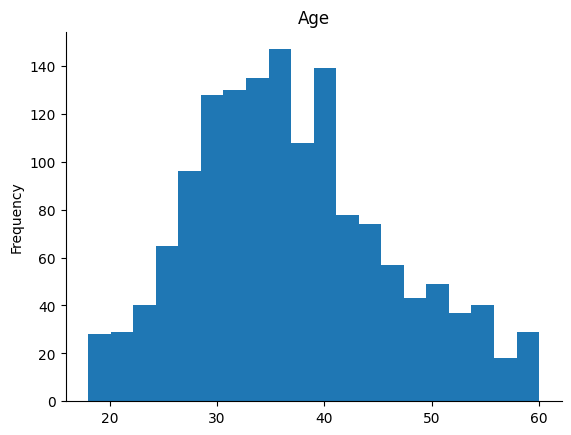

In [60]:
from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Se observa que la frecuencia de viajes estan relacionadas en promedio de edad de 30 a 40, y en menor relacion los menores y mayores.

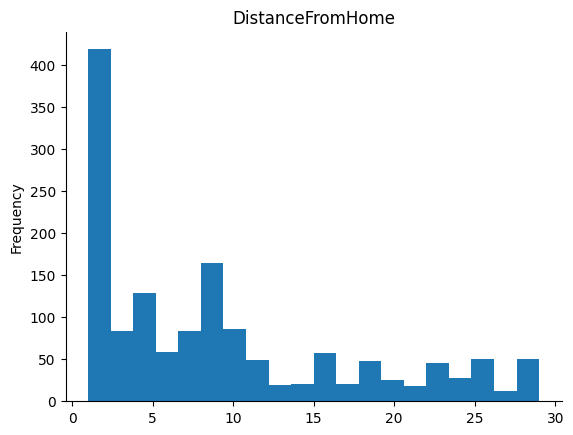

In [61]:
from matplotlib import pyplot as plt
df['DistanceFromHome'].plot(kind='hist', bins=20, title='DistanceFromHome')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Se Observa que la relacion distancia Frecuencia, es mayormente relacionada con menor distancia mas frecuencia, podemos decir que la distancia influye fuertemente en los trabajadores.

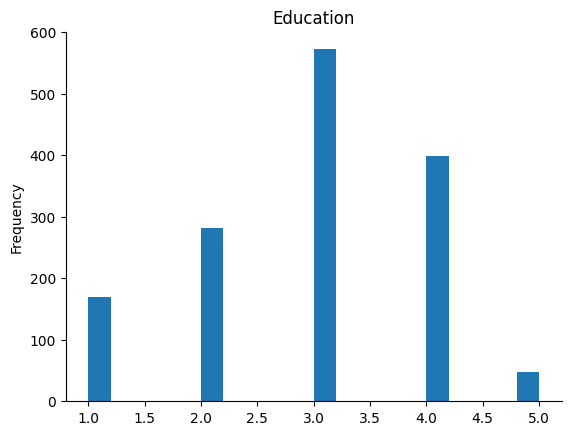

In [63]:
from matplotlib import pyplot as plt
df['Education'].plot(kind='hist', bins=20, title='Education')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Podemos deducir que la educacion en promedio bordea los 3 años, y en menos 1 y 5, esto indica que el personal necesita capacitacion y experiencia.